In [157]:
# -*- coding: utf-8 -*-

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'Malgun Gothic' 
sns.set(style="whitegrid")

file_path = '13 국가별 주류분석/수업자료/drinks.csv'
drinks = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.
drinks['continent'] = drinks['continent'].fillna('OT')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


###  1.대륙별 평균 beer_servings을 구하고, 아래의 결과를 출력하시오.

In [158]:
# 여기에 1번 문제 code를 작성하시오.

continent_beer_servings = drinks.groupby('continent')[['beer_servings']].mean()
continent_beer_servings = continent_beer_servings.reset_index()
continent_beer_servings = continent_beer_servings.rename(columns={'beer_servings':'beer_servings_cont_avg'})
continent_beer_servings

,continent,beer_servings_cont_avg
0,AF,61.471698
1,AS,37.045455
2,EU,193.777778
3,OC,89.687500
4,OT,145.434783
5,SA,175.083333


In [159]:
drinks = pd.merge(drinks, continent_beer_servings, on='continent',how='outer') # how 안해도 나옴 ㅎㅎ
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_servings_cont_avg
0,Afghanistan,0,0,0,0.0,AS,37.045455
1,Bahrain,42,63,7,2.0,AS,37.045455
2,Bangladesh,0,0,0,0.0,AS,37.045455
3,Bhutan,23,0,0,0.4,AS,37.045455
4,Brunei,31,2,1,0.6,AS,37.045455
...,...,...,...,...,...,...,...
188,Samoa,105,18,24,2.6,OC,89.687500
189,Solomon Islands,56,11,1,1.2,OC,89.687500
190,Tonga,36,21,5,1.1,OC,89.687500
191,Tuvalu,6,41,9,1.0,OC,89.687500


In [42]:
# 인덱스 순서를 그냥 country 기준으로 바꾼거임

drinks = drinks.sort_values('country')
drinks=drinks.reset_index(drop=True) # 새로 만든 인덱스 컬럼 다시 삭제
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,beer_servings_cont_avg
0,Afghanistan,0,0,0,0.0,AS,37.045455
1,Albania,89,132,54,4.9,EU,193.777778
2,Algeria,25,0,14,0.7,AF,61.471698
3,Andorra,245,138,312,12.4,EU,193.777778
4,Angola,217,57,45,5.9,AF,61.471698
...,...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA,175.083333
189,Vietnam,111,2,1,2.0,AS,37.045455
190,Yemen,6,0,0,0.1,AS,37.045455
191,Zambia,32,19,4,2.5,AF,61.471698


In [43]:
# 결과를 출력합니다.
drinks[['country', 'continent', 'beer_servings_cont_avg']].sample(5).head()

,country,continent,beer_servings_cont_avg
159,Sri Lanka,AS,37.045455
167,Switzerland,EU,193.777778
180,USA,OT,145.434783
85,Jordan,AS,37.045455
187,Vanuatu,OC,89.687500


###  2. 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서, spirit을 가장 많이 마시는 국가를 구하시오.

In [54]:
# 여기에 2번 문제 code를 작성하시오.

# 전체 평균
mean_alcohol = drinks['total_litres_of_pure_alcohol'].mean()
mean_alcohol

4.717098445595855

In [132]:
# 대륙 평균

continent_avg = drinks.groupby('continent')[['total_litres_of_pure_alcohol']].mean()
continent_avg

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
EU,8.617778
OC,3.381250
OT,5.995652
SA,6.308333


In [134]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙
continent_above_avg = continent_avg[continent_avg['total_litres_of_pure_alcohol']<mean_alcohol]
continent_above_avg

,total_litres_of_pure_alcohol
continent,
AF,3.007547
AS,2.170455
OC,3.381250


In [142]:
# 전체 평균보다 적은 알코올을 섭취하는 대륙 중에서 spirit을 가장 많이 마시는 국가
countries_above_avg = drinks[(drinks['continent']==('AF'))|(drinks['continent']==('AS'))|(drinks['continent']==('OC'))]
countries_above_avg

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
2,Algeria,25,0,14,0.7,AF
4,Angola,217,57,45,5.9,AF
8,Australia,261,72,212,10.4,OC
12,Bahrain,42,63,7,2.0,AS
...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [156]:
result_country = countries_above_avg.sort_values(by='spirit_servings',ascending=False)
result_country['country'].iloc[0]

# print(result_country.loc[sprit_most.spirit_servings.idxmax()].country)
# 이런방법도 있다.

'Russian Federation'

In [114]:
import chardet
import pandas as pd
data = pd.read_csv('기말모음/2022/누비자.csv', encoding='EUC-KR')
data

,번호,터미널명,구,동,주소,등록일자,보관대수,위도,경도
0,1,동읍동중학교 앞,의창구,동읍,경남 창원시 의창구 동읍 신방리 871-6 수로,2011-08-04,16,35.291246,128.675877
1,2,동읍보건지소,의창구,동읍,경남 창원시 의창구 동읍 용잠리 230-7 대,2009-05-14,15,35.279618,128.688719
2,3,동읍주민복지관,의창구,동읍,경남 창원시 의창구 동읍 용잠리 687),2021-07-27,15,35.283956,128.681827
3,4,자여민원센터,의창구,동읍,경남 창원시 의창구 동읍 송정리 98-21,2009-05-14,10,35.277152,128.700567
4,5,주남저수지 주차장,의창구,동읍,경남 창원시 의창구 동읍 월잠리 303-7,2019-10-15,15,35.306059,128.678244
...,...,...,...,...,...,...,...,...,...
278,279,용원공영주차빌딩,진해구,웅동2동,경남 창원시 진해구 용원동 1219-1,2020-02-13,15,35.100001,128.814410
279,280,용원동 애플타운상가 옆,진해구,웅동2동,경남 창원시 진해구 용원동 1359,2020-09-11,18,35.088585,128.814102
280,281,용원하나로마트(맞은편),진해구,웅동2동,경남 창원시 진해구 용원동 1289,2015-06-14,17,35.100843,128.809458
281,282,웅2동 청안공원,진해구,웅동2동,경남 창원시 진해구 용원동 1207-1 공원,2011-08-05,11,35.103839,128.806651


### 3. 창원시 구별 누비자 보관대수를 집계하고 이를 막대그래프로 시각화 하시오.

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      283 non-null    int64  
 1   터미널명    283 non-null    object 
 2   구       283 non-null    object 
 3   동       283 non-null    object 
 4   주소      283 non-null    object 
 5   등록일자    283 non-null    object 
 6   보관대수    283 non-null    int64  
 7   위도      283 non-null    float64
 8   경도      283 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 20.0+ KB


In [71]:
# 여기에 3번 문제 code를 작성하시오.

keep_num = data.groupby('구')['보관대수'].sum()
keep_num

구
마산합포구     411
마산회원구     653
성산구      2854
의창구      1542
진해구       932
Name: 보관대수, dtype: int64

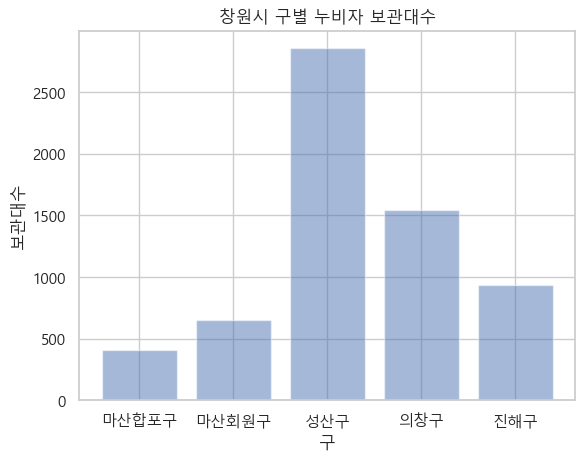

In [99]:
plt.rcParams['font.family'] = 'Malgun Gothic' 

num = keep_num.values.tolist()
gu =keep_num.index.tolist()

plt.bar(gu,num, alpha=0.5)
plt.xlabel('구')
plt.ylabel('보관대수')
plt.title('창원시 구별 누비자 보관대수')
plt.show()

### 4. "등록일자" 컬럼을 년도(예를들어 2011)만 표시하는 "년도" 컬럼으로 바꾸시오.
###       "년도" 컬럼의 값도 정수값으로 변환하고 결과 DataFrame을 처음 10개만 출력하시오.   


In [115]:
# 여기에 4번 문제 code를 작성하시오.
data['등록일자']= data['등록일자'].str[:4]
# data['년도'] = data['년도'].apply(lambda x: int(x[:4]))
data = data.rename(columns={'등록일자':'년도'})
data

,번호,터미널명,구,동,주소,년도,보관대수,위도,경도
0,1,동읍동중학교 앞,의창구,동읍,경남 창원시 의창구 동읍 신방리 871-6 수로,2011,16,35.291246,128.675877
1,2,동읍보건지소,의창구,동읍,경남 창원시 의창구 동읍 용잠리 230-7 대,2009,15,35.279618,128.688719
2,3,동읍주민복지관,의창구,동읍,경남 창원시 의창구 동읍 용잠리 687),2021,15,35.283956,128.681827
3,4,자여민원센터,의창구,동읍,경남 창원시 의창구 동읍 송정리 98-21,2009,10,35.277152,128.700567
4,5,주남저수지 주차장,의창구,동읍,경남 창원시 의창구 동읍 월잠리 303-7,2019,15,35.306059,128.678244
5,6,감계공원,의창구,북면,경남 창원시 의창구 북면 감계리 237-1 (경남은행북면점앞),2018,10,35.301281,128.594201
6,7,감계덕산아내APT버스정류소옆,의창구,북면,경남 창원시 의창구 북면 감계리 740-2 (덕산아내버스정류소),2018,10,35.302350,128.590372
7,8,북면사무소,의창구,북면,경남 창원시 의창구 북면 신촌리 964-5 전,2010,10,35.348097,128.607609
8,9,북면족욕체험장,의창구,북면,경남 창원시 의창구 북면 신촌리 북면온천,2011,9,35.353290,128.611675
9,10,농협 서상동지점,의창구,의창동,경남 창원시 의창구 서상동 344-4,2009,15,35.262178,128.618327


In [118]:
data['년도'] = data['년도'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   번호      283 non-null    int64  
 1   터미널명    283 non-null    object 
 2   구       283 non-null    object 
 3   동       283 non-null    object 
 4   주소      283 non-null    object 
 5   년도      283 non-null    int32  
 6   보관대수    283 non-null    int64  
 7   위도      283 non-null    float64
 8   경도      283 non-null    float64
dtypes: float64(2), int32(1), int64(2), object(4)
memory usage: 18.9+ KB


In [119]:
data.head(10)

,번호,터미널명,구,동,주소,년도,보관대수,위도,경도
0,1,동읍동중학교 앞,의창구,동읍,경남 창원시 의창구 동읍 신방리 871-6 수로,2011,16,35.291246,128.675877
1,2,동읍보건지소,의창구,동읍,경남 창원시 의창구 동읍 용잠리 230-7 대,2009,15,35.279618,128.688719
2,3,동읍주민복지관,의창구,동읍,경남 창원시 의창구 동읍 용잠리 687),2021,15,35.283956,128.681827
3,4,자여민원센터,의창구,동읍,경남 창원시 의창구 동읍 송정리 98-21,2009,10,35.277152,128.700567
4,5,주남저수지 주차장,의창구,동읍,경남 창원시 의창구 동읍 월잠리 303-7,2019,15,35.306059,128.678244
5,6,감계공원,의창구,북면,경남 창원시 의창구 북면 감계리 237-1 (경남은행북면점앞),2018,10,35.301281,128.594201
6,7,감계덕산아내APT버스정류소옆,의창구,북면,경남 창원시 의창구 북면 감계리 740-2 (덕산아내버스정류소),2018,10,35.302350,128.590372
7,8,북면사무소,의창구,북면,경남 창원시 의창구 북면 신촌리 964-5 전,2010,10,35.348097,128.607609
8,9,북면족욕체험장,의창구,북면,경남 창원시 의창구 북면 신촌리 북면온천,2011,9,35.353290,128.611675
9,10,농협 서상동지점,의창구,의창동,경남 창원시 의창구 서상동 344-4,2009,15,35.262178,128.618327


### 5. 최초 설치를 시작한 시작년도 부터 마지막 년도까지 보관대수를 누적하는 그래프를 그리시오.   

In [121]:
# 여기에 5번 문제 code를 작성하시오.
data.sort_values(by='년도')

,번호,터미널명,구,동,주소,년도,보관대수,위도,경도
79,80,용지동 주민센터,성산구,용지동,경남 창원시 성산구 용호동 62-2 용지동 주민센터,2008,30,35.235998,128.684640
38,39,도계초교 앞 노외주차장,의창구,명곡동,경남 창원시 의창구 도계동 438번지 (도계초등학교 앞 노외주차장),2008,27,35.259699,128.638594
42,43,명서다리 앞 버스정류소,의창구,명곡동,경남 창원시 의창구 명서동 82번지 명곡교 옆 도계방면 버스정류장,2008,25,35.246094,128.644197
47,48,의창구청,의창구,명곡동,경남 창원시 의창구 도계동 895번지 명곡동 주민센터,2008,20,35.253822,128.639957
60,61,봉림상가사거리,의창구,봉림동,경남 창원시 의창구 봉곡동 139번지 버스정류장 앞,2008,30,35.245886,128.671052
...,...,...,...,...,...,...,...,...,...
2,3,동읍주민복지관,의창구,동읍,경남 창원시 의창구 동읍 용잠리 687),2021,15,35.283956,128.681827
273,274,남문 세스페데스공원 옆,진해구,웅천동,경남 창원시 진해구 남문동 1253-5,2021,20,35.105466,128.751016
128,129,상남동 공영주차빌딩,성산구,상남동,경남 창원시 성산구 상남동 76-2,2021,23,35.221903,128.681182
35,36,도계동 안골,의창구,명곡동,경남 창원시 의창구 도계동 88-6(도),2021,20,35.263783,128.642599


In [126]:
result = data.groupby('년도')['보관대수'].sum()
result

년도
2008     570
2009    1804
2010    1133
2011    1282
2012     225
2013      59
2014     137
2015     173
2016     235
2017     198
2018     119
2019     170
2020     138
2021     149
Name: 보관대수, dtype: int64

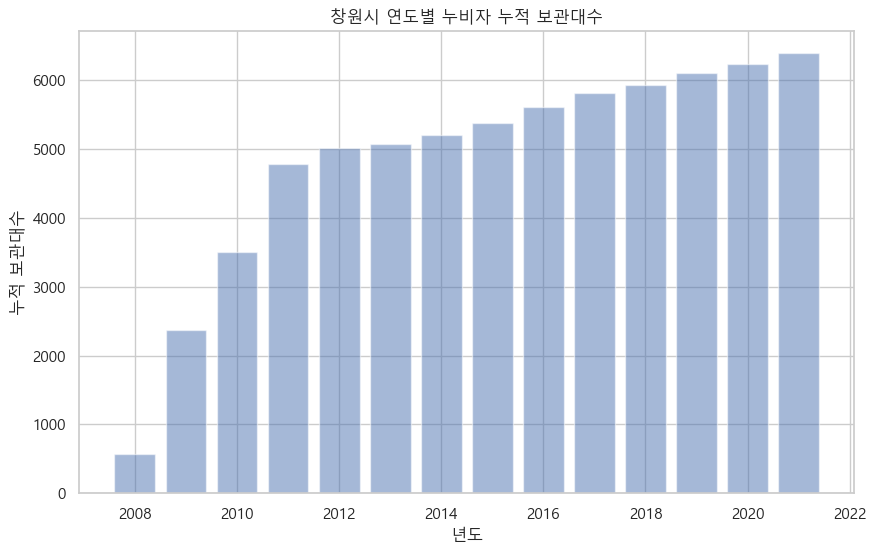

In [170]:
plt.rcParams['font.family'] = 'Malgun Gothic' 
plt.figure(figsize=(10,6))
x = result.index.tolist()
y = result.values.tolist()
sum=0
sum_list = []
for i in  y:
    sum +=i
    sum_list.append(sum)

plt.bar(x,sum_list, alpha=0.5)
plt.xlabel('년도')
plt.ylabel('누적 보관대수')
plt.title('창원시 연도별 누비자 누적 보관대수')
plt.show()